In [2]:
import numpy as np
import pandas as pd

In [3]:
ds=pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\airlines_flights_data.csv")#loading data file 

C:\Users\Hp\AppData\Local\Temp\ipykernel_13684\3022304317.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ds=pd.read_csv(r"C:\Users\Hp\OneDrive\Documents\airlines_flights_data.csv")#loading data file


In [3]:
ds

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265.0
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105.0
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099.0
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.0,49,81585.0


In [4]:
#To find datatypes of columns
ds.dtypes


index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration             object
days_left             int64
price               float64
dtype: object

In [5]:
#Checking strings of column
ds['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [6]:
#Finding null values count
ds.isna().sum()

index                0
airline              0
flight              80
source_city          7
departure_time      13
stops                0
arrival_time         7
destination_city     0
class               17
duration            14
days_left            0
price               21
dtype: int64

In [7]:
#Percentage conversion of null values
ds.isna().sum()/len(ds)*100

index               0.000000
airline             0.000000
flight              0.026653
source_city         0.002332
departure_time      0.004331
stops               0.000000
arrival_time        0.002332
destination_city    0.000000
class               0.005664
duration            0.004664
days_left           0.000000
price               0.006996
dtype: float64

## Data Cleaning

In [7]:
ds['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [8]:
#Finding nulls values in column
ds[ds['flight'].isna()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
25,25,Vistara,NaN,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6690.0
37,37,Air_India,NaN,Delhi,Early_Morning,one,Afternoon*,Mumbai,Economy,8.83,1,11900.0
54,54,Indigo,NaN,Delhi,Afternoon,one,Evening,Mumbai,Economy,3.83,1,13279.0
68,68,GO_FIRST,NaN,Delhi,Afternoon,one,Night,Mumbai,Economy,9.25,1,13932.0
94,94,Vistara,NaN,Delhi,Evening,one,Afternoon,Mumbai,Economy,19.5,1,17505.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206674,206674,Vistara,NaN,Delhi,Night,one,Afternoon,Mumbai,Business,17.92,1,51731.0
206701,206701,Air_India,NaN,Delhi,Evening,zero,Evening,Mumbai,Business,2.0,2,25612.0
206723,206723,Air_India,NaN,Delhi,Morning,one,Night,Mumbai,Business,14.17,2,44450.0
206739,206739,Air_India,NaN,Delhi,Evening,one,Evening,Mumbai,Business,22.75,2,51059.0


### As the null values number is low, dropping them will have least Effect

In [6]:
ds=ds.dropna()


### After removing null values

In [4]:
ds.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
#No null values in source_city column
ds[ds['source_city'].isna()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [13]:
#finding the improper string values
ds['source_city'].unique()

array(['Delhi', 'Mumbai', 'Mumbai)', 'Bangalore', 'Kolkata', 'Kolkata)',
       'Hyderabad', 'Chennai', 'Chennai*('], dtype=object)

### Regex used for finding and replacing characters with other

In [7]:
ds['source_city']=ds['source_city'].replace(r'[)(*]','',regex=True)

In [8]:
ds['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [17]:
ds['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Morning*/', 'Afternoon',
       'Evening)', 'Afternoon/', 'Night', 'Evening/', 'Morning)',
       'Early_Morning/', 'Late_Night', 'Night/'], dtype=object)

In [25]:
ds['departure_time']=ds['departure_time'].replace('[/)*]','',regex=True)

In [26]:
ds['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [20]:
ds['stops'].unique()

array(['zero', 'one1', 'one', 'one/', 'two_or_more'], dtype=object)

In [16]:
ds['stops']=ds['stops'].replace(r'[/1]','',regex=True)

In [17]:
#After removing specific characters
ds['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [23]:
ds['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Night/', 'Nigh/t', 'Evening/', 'Late_Night'], dtype=object)

In [11]:
ds['arrival_time']=ds['arrival_time'].replace(r'[/*]','',regex=True)

In [12]:
#after removing specific characters
ds['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [9]:
ds['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [27]:
ds['class'].unique()

array(['Economy', '$Economy', 'Economy/', 'Business'], dtype=object)

In [4]:
ds['class']=ds['class'].replace(r'[$/]','',regex=True)

In [12]:
ds['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [30]:
ds['duration'].unique()

array(['2.17', '2.33', '2.25', '2.08', '12.25', '16.33', '11.75', '14.5',
       '15.67', '3.75', '2.5', '5.83', '8', '6', '14.67', '18', '23.17',
       '24.17', '4.5', '15.25', '11', '19.08', '22.83', '26.42', '17.75',
       '19.58', '26.67', '15.17', '20.83', '11.42', '22.25', '26',
       '21.75', '4.42', '8.33', '10.42', '23.75', '6.5', '12.42', '21.08',
       '28.17', '28.25', '17.92', '16.17', '7.08', '13.83', '7.58',
       '15.83', '24.42', '4.17', '4.25', '5.08', '29.33', '17', '27.17',
       '24.75', '5.75', '12.75', '13.75', '17.83', '5.5', '23.83', '5',
       '26.5', '12.83', '8.92', '11.17', '12.17', '15.58', '15.75',
       '7.92', '13.25', '16', '22.75', '6.33', '7.25', '30.08', '18.25',
       '6.08', '2', '12.33', '3.5', '10.25', '14.17', '15.7*', '25.58',
       '4.08', '9.75', '6.67', '9.67', '3.83', '7.67', '10.08', '12.58',
       '7/', '8.25', '15.5', '10.17', '23.5', '25.75', '11.5', '19.5',
       '21.42', '14.25', '7.75', '5.33', '5.67', '15.17*', '4.75',


In [10]:
ds['duration']=ds['duration'].replace(r'[/*]','',regex=True)

In [16]:
#After replacing /* characters
ds['duration'].unique()

array(['2.17', '2.33', '2.25', '2.08', '12.25', '16.33', '11.75', '14.5',
       '15.67', '3.75', '2.5', '5.83', '8', '6', '14.67', '18', '23.17',
       '24.17', '4.5', '15.25', '11', '19.08', '22.83', '26.42', '17.75',
       '19.58', '26.67', '15.17', '20.83', '11.42', '22.25', '26',
       '21.75', '4.42', '8.33', '10.42', '23.75', '6.5', '12.42', '21.08',
       '28.17', '28.25', '17.92', '16.17', '7.08', '13.83', '7.58',
       '15.83', '24.42', '4.17', '4.25', '5.08', '29.33', '17', '27.17',
       '24.75', '5.75', '12.75', '13.75', '17.83', '5.5', '23.83', '5',
       '26.5', '12.83', '8.92', '11.17', '12.17', '15.58', '15.75',
       '7.92', '13.25', '16', '22.75', '6.33', '7.25', '30.08', '18.25',
       '6.08', '2', '12.33', '3.5', '10.25', '14.17', '15.7', '25.58',
       '4.08', '9.75', '6.67', '9.67', '3.83', '7.67', '10.08', '12.58',
       '7', '8.25', '15.5', '10.17', '23.5', '25.75', '11.5', '19.5',
       '21.42', '14.25', '7.75', '5.33', '5.67', '4.75', '19.33', '6.

### Changing datatype from Object to float

In [11]:
ds=ds.astype({'duration':'float'})

In [17]:
ds.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price               float64
dtype: object

In [37]:
ds['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [7]:
ds.drop(columns='index',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_8072\2369661624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns='index',inplace=True)


In [12]:
ds[ds.duplicated(keep='first')]#No duplicated values

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


## Data Analysis

In [14]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [8]:
ds.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

### Counting the different airline occupancy in flights from data

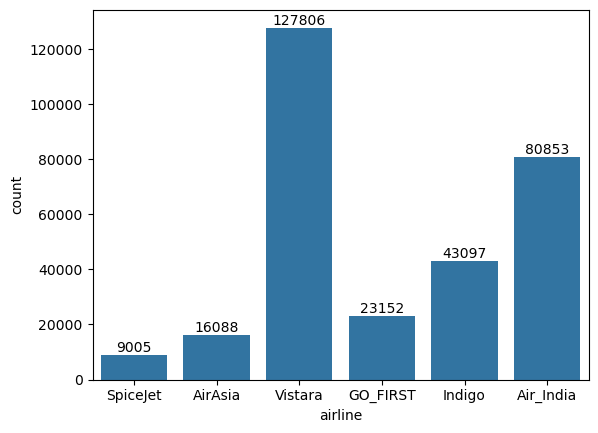

In [15]:
vh=sbn.countplot(data=ds,x='airline')
for bars in vh.containers:#For labeling at top
    vh.bar_label(bars)

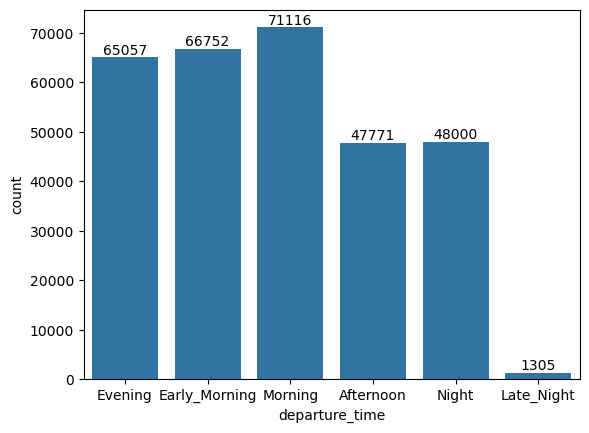

In [21]:
lb=sbn.countplot(data=ds,x='departure_time')
for bars in lb.containers:
    lb.bar_label(bars)

> As shown above Mostly flights departs at morning and least flights depart at late_night

### Source city to destination city by duration

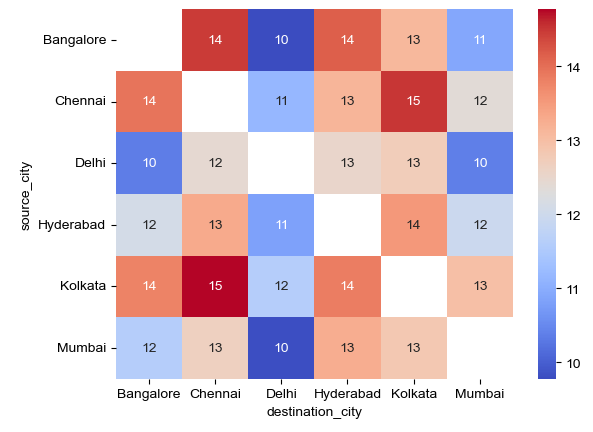

In [15]:
pivot = ds.pivot_table(index='source_city', columns='destination_city', values='duration', aggfunc='mean')
sbn.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
sbn.set(rc={'figure.figsize':(18,8)})

> As shown above flight travel between kolkata to chennai takes more time, it is less between Delhi to Bangalore in average

### Price Distribution

<Axes: xlabel='price', ylabel='Count'>

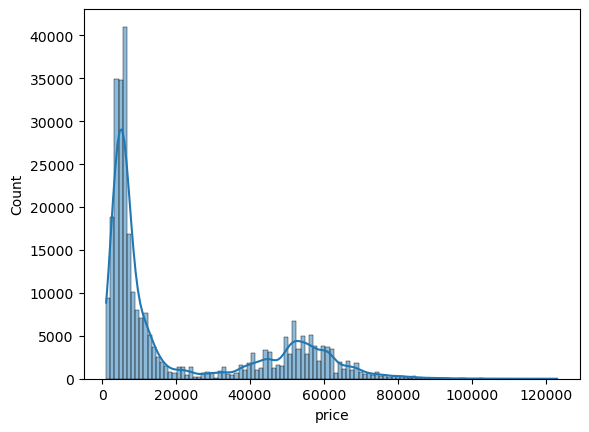

In [11]:
sbn.histplot(ds['price'],kde=True)

> As shown above most ticket prices concentrated at low price range

### Average price by airline

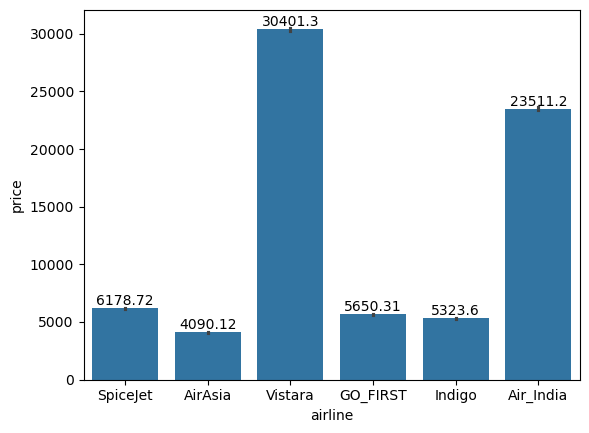

In [13]:
lb=sbn.barplot(x='airline',y='price',data=ds)
for bars in lb.containers:
    lb.bar_label(bars)

> On Average Vistara Airline holds first position in pricing

### Flight duration with price comparision according to class

<Axes: xlabel='duration', ylabel='price'>

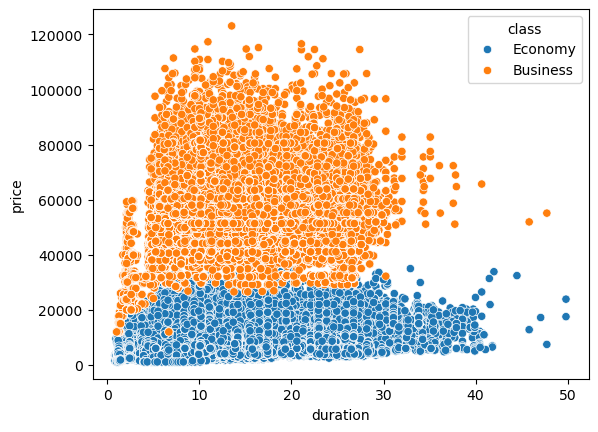

In [21]:
sbn.scatterplot(x='duration',y='price',hue='class',data=ds)

> Business class Tickets are high priced than economy class for same duration and business class tickets lowers as duration increases

### Departure time Trends

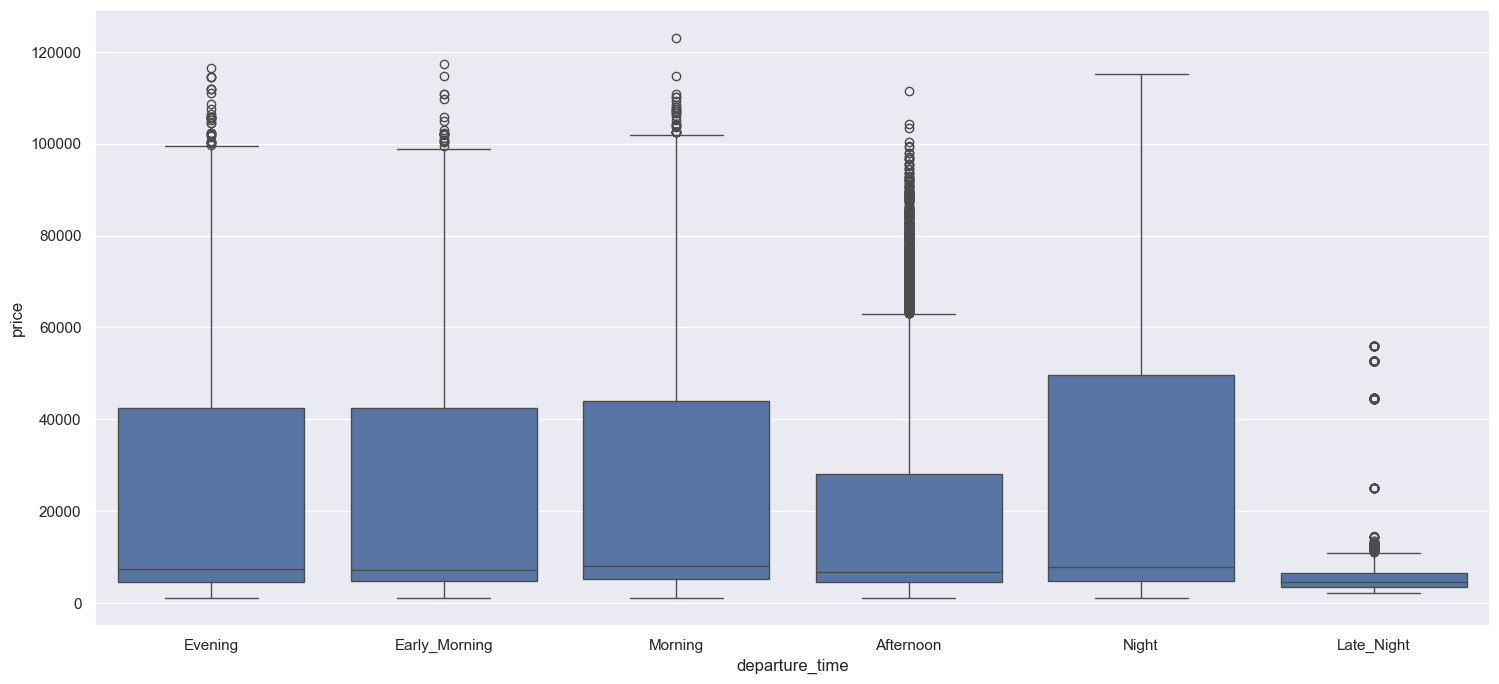

In [29]:
sbn.boxplot(x='departure_time',y='price',data=ds)
sbn.set(rc={'figure.figsize':(18,10)})

> Most pricing ranges are at night with no outliers and outliers are more at Aftermoon 

### Stops with prices

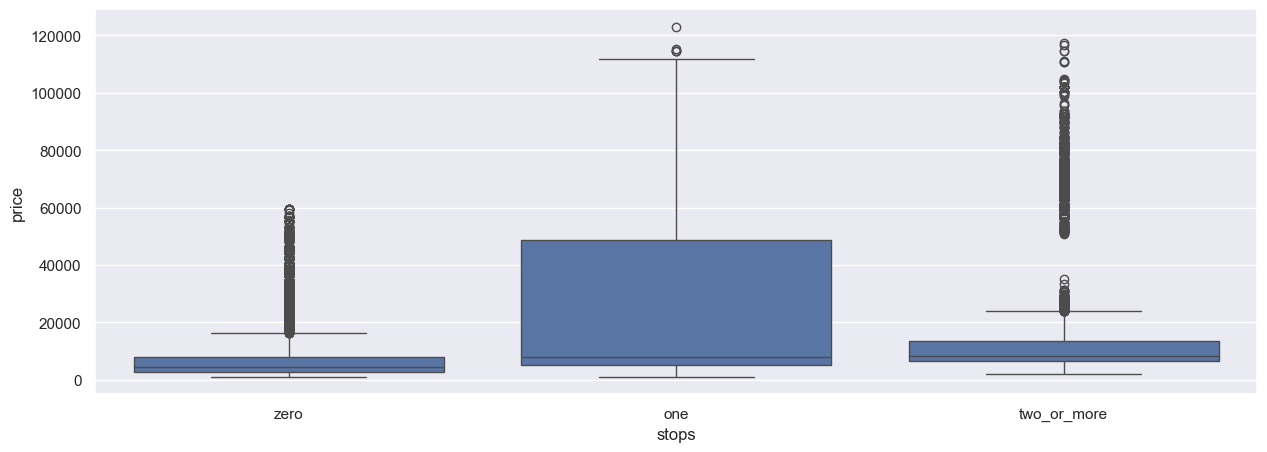

In [36]:
sbn.boxplot(x='stops',y='price',data=ds)
sbn.set(rc={'figure.figsize':(18,5)})

> More Price range for one stop during travel with less outliers and more pricing outliers for two or more stops

### Source Vs destination heatmap on price consideration

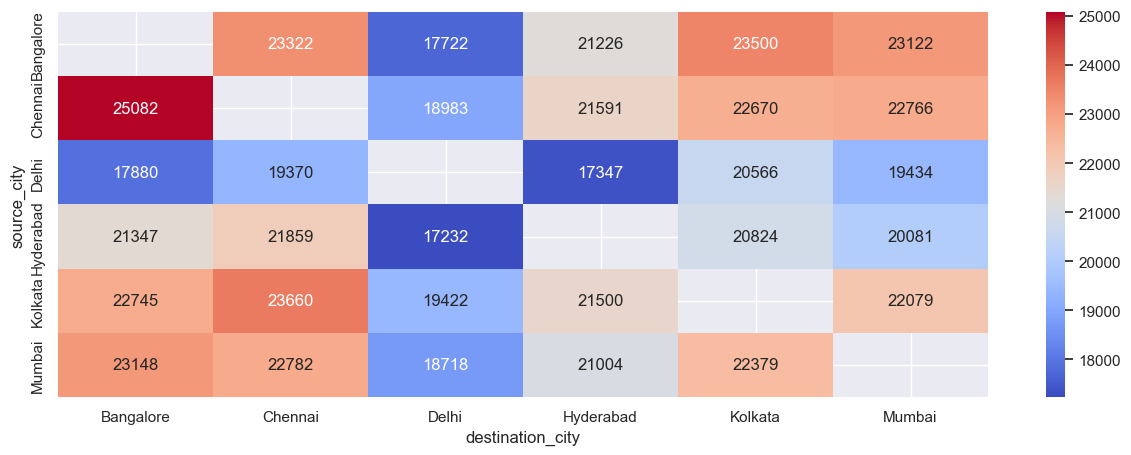

In [52]:
pivot = ds.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc='mean')
sbn.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
sbn.set(rc={'figure.figsize':(18,8)})

> As shown above pricing is higher while travelling from chennai to Bangalore and least pricing from Bangalore to Delhi on Average

### Price trend line with days left

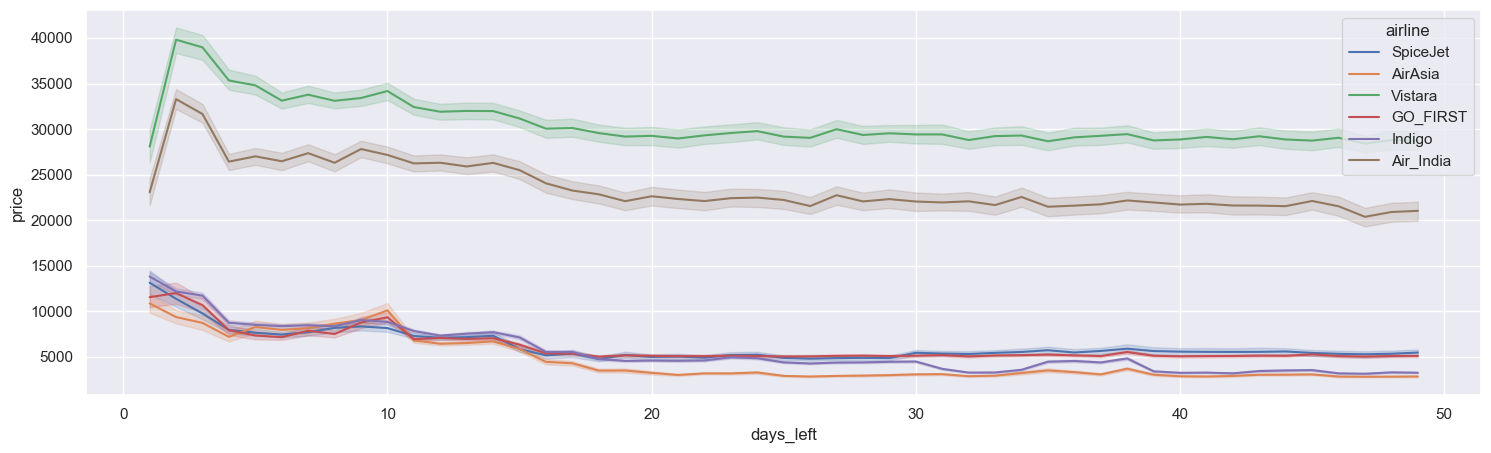

In [45]:
sbn.lineplot(x='days_left',y='price',hue='airline',data=ds)
sbn.set(rc={'figure.figsize':(18,8)})

> As shown above pricing becomes higher as days left to fly decreases

<Axes: xlabel='airline', ylabel='count'>

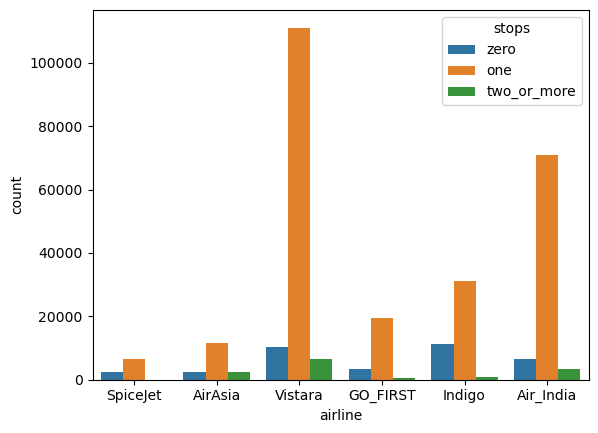

In [41]:
sbn.countplot(data=ds,x='airline',hue='stops')

> As shown above Every airline have most  one stop travels

In [56]:
columns=['duration','days_left','price']
ds[columns].corr()

,duration,days_left,price
duration,1.000000,-0.039269,0.204141
days_left,-0.039269,1.000000,-0.091985
price,0.204141,-0.091985,1.000000


In [57]:
ds[columns].sum()

duration     3.666642e+06
days_left    7.803071e+06
price        6.268109e+09
dtype: float64

### Correlation Heat map

<Axes: >

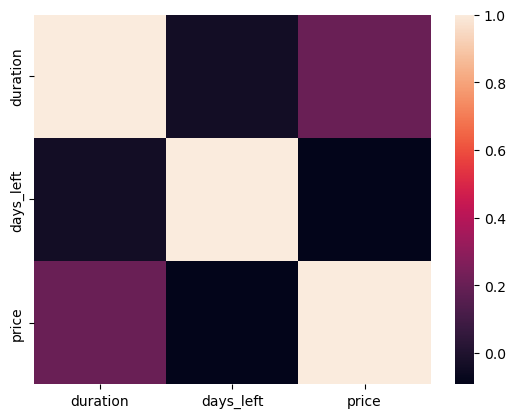

In [58]:
sbn.heatmap(data=ds[columns].corr())

> It shows low correlation  between price and duration

<Axes: xlabel='price', ylabel='duration'>

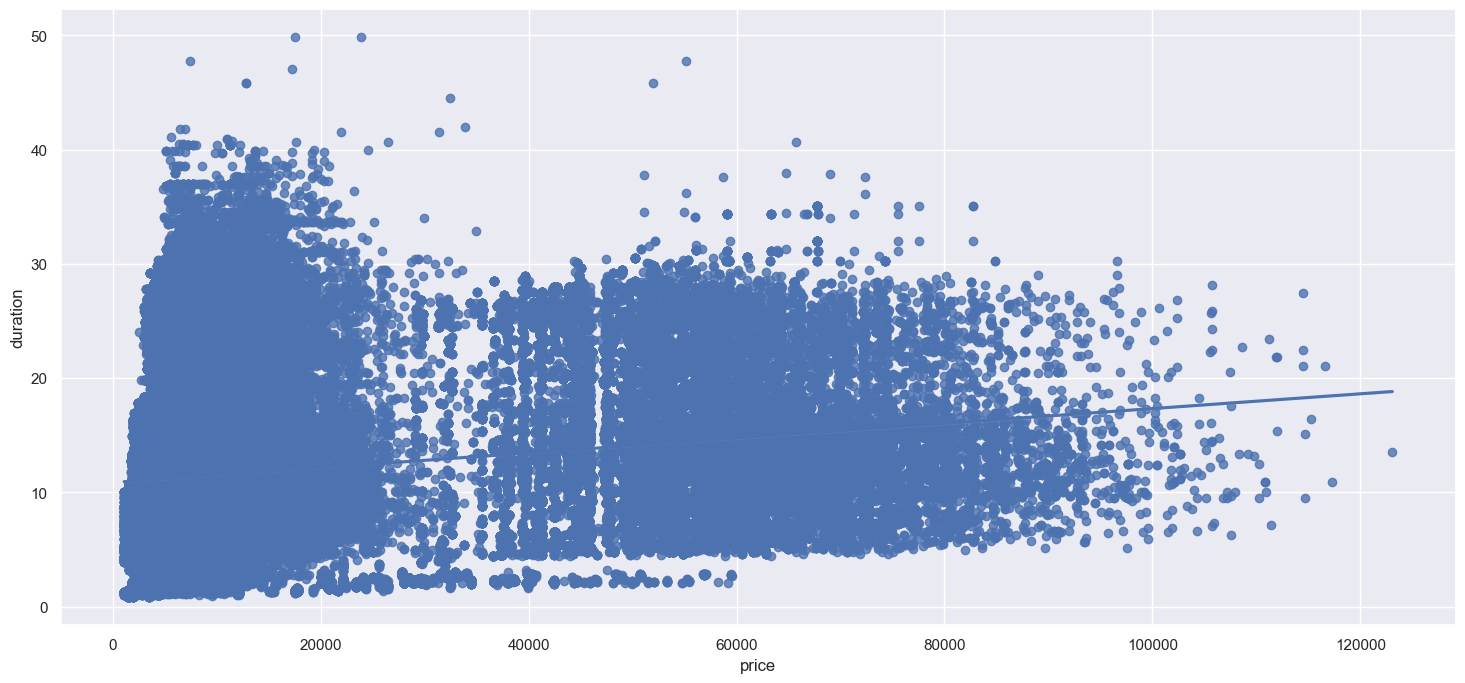

In [19]:
# linear Regression plot between price and duration
sbn.regplot(data=ds,x='price',y='duration')